In [16]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir, mkdir

In [17]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)

from utils import load_spectral_types

In [18]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [19]:
name = "Spectral-Class-Velocity"
data_dir = join(root_data_dir, name)
try:
    mkdir(data_dir)
    print(f"Creating {name} dir in Data dir")
except FileExistsError:
    print("Directory already exist. Good to go!")

Directory already exist. Good to go!


In [20]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
# file = join(data_dir, "mamajek-spectral-class.hdf5")
files

['/home2/s20321005/Thesis-Project/Data/Neighbour/neighbour.hdf5']

In [22]:
df = vaex.open_many(files)
df

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,3.8327582915572105,-1.4313252511256076,12.86,12.043,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,5.353752577972431,-0.3480518575453191,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,M,--,nan,nan,--,3352.6962890625,2.923583984375,1.535400390625,0.0,gspphot,4.952499866485596,0.0055999755859375,0.0016002655029296875,0.0,gspphot,-0.21250000596046448,0.009899988770484924,0.004200011491775513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,8.146696274253422,87.63158693686636,-29.888253508420693,82.37710441190528,6.163959125900999,-43.94672854928757,0.03169385810834679,0.030353553205174022,-18.254316210789785,2.560346644879083,-0.04861264632954577,0.014719890215341326,nan,nan,nan,nan,nan,nan,nan,nan
1,3.8332158296206202,-1.4705536204592826,11.838,11.034,5769848452585664768,17.014656,-5.589498622907398,0.0140676545,16.070345820394742,0.016985236,7.3943173824366335,0.013919218,14.063171,15.032779,13.086449,5.335780523453254,-0.3835036530135326,133.2316,126.8792,135.253,0.4017,0.3763,0.5235,M,--,31.701446533203125,2.3632290363311768,gaia,3956.859130859375,13.845458984375,47.780029296875,0.0,gspphot,4.696700096130371,0.02349996566772461,0.017699718475341797,0.0,gspphot,-0.08190000057220459,0.11660000681877136,0.07380000036209822,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.8039999,6.182490735712269,135.23898803360157,-50.60262975233018,125.41514161576032,1.9055629007769193,16.907611885590025,0.014656890213292105,0.01647946313895594,10.838333843777704,1.2215283281100087,0.022974978420221552,0.009672832698179248,-1.8107602785067858,0.8845105570304012,33.4540332399622,2.1915794309798495,18.538438173876052,1.2794508991736029,27.87455437402087,1.7793592561903362
2,3.8346654651907417,-1.4144265544287782,9.935,9.111,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,5.361660249342902,-0.33288792556267294,nan,nan,nan,nan,nan,nan,M,--,31.392871856689453,0.6936047673225403,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.7300000190734863,0.04999995231628418,0.06000000238418579,0.0,gspspec,0.23999999463558197,0.03999999165534973,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.82400036,6.46166280113086,49.507104159283486,-16.17762322571451,46.789292247318365,86.96745942661094,-160.6847113959491,0.015268494877565559,0.015281674361303673,-37.706864686008544,20.408103522709055,-0.023837543870954808,0.013248471351061775,-45.89522257419966,0.22776876903148444,17.347869976575154,0.6555739390825701,-5.766928347540318,0.396504464103475,26.156869452442187,0.5222422058234985
3,3.83521967704142,-1.428977137509852,13.49,12.615,5772540538087138688,58.542484,-20.266122669434054,0.048241053,-54.922736075794205,0.04235118,6.585139220116088,0.038885877,16.387419,17.934364,15.180468,5.355146842172845,-0.3460749401539776,153.0864,152.3683,153.8725,0.5895,0.5819,0.5966,M,--,nan,nan,--,3415.5517578125,2.416259765625,2.121337890625,0.0,gspphot,4.859099864959717,0.0035996437072753906,0.00279998779296875,0.0,gspphot,-0.04259999841451645,0.006200000643730164,0.004199996590614319,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,n

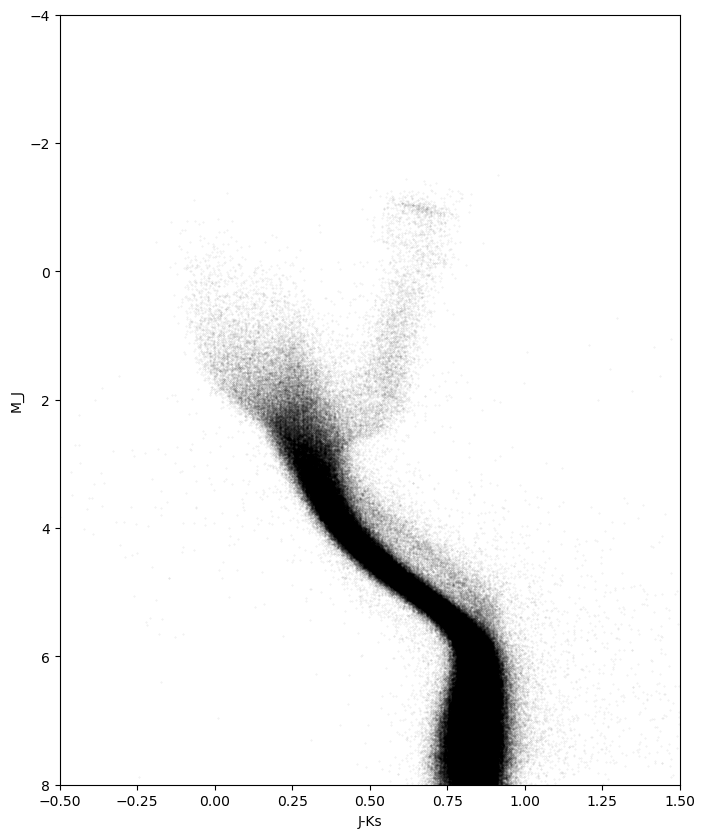

In [25]:
# HR diagram
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel("J-Ks")
plt.ylabel("M_J")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
plt.show()

In [28]:
df_s = load_spectral_types()
df_s

HELLOOO #    SpT    Teff     logT    BCv    logL    Mbol    R_Rsun    Mv     B-V     Bt-Vt    G-V    Bp-Rp    G-Rp    M_G    b-y     U-B     V-Rc    V-Ic    V-Ks    J-H    H-Ks    M_J    M_Ks    Ks-W1    W1-W2    W1-W3    W1-W4    g-r    i-z    z-Y    Msun
0    O3V    44900.0  4.652   -4.01  5.82    -9.81   13.43     -5.8   -0.33   nan      nan    nan      nan     nan    nan     -1.175  nan     nan     nan     nan    nan     nan    nan     nan      nan      nan      nan      nan    nan    nan    59.0
1    O4V    42900.0  4.632   -3.89  5.65    -9.39   12.13     -5.5   -0.326  nan      nan    nan      nan     nan    nan     -1.16   nan     nan     nan     nan    nan     nan    nan     nan      nan      nan      nan      nan    nan    nan    48.0
2    O5V    41400.0  4.617   -3.76  5.54    -9.11   11.45     -5.35  -0.323  nan      nan    nan      nan     nan    -0.133  -1.15   nan     nan     nan     nan    nan     nan    nan     nan      nan      nan      nan      -0.62  nan    nan    4

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [30]:
jk = df_s["J-K"].to_numpy()
mj = df_s["M_J"].to_numpy()
check = mj < 5
jk = jk[check]
mj = mj[check]

In [31]:
up_x = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
up_y = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

low_x = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
low_y = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [32]:
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(up_x, up_y, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(low_x, low_y, fill_value="extrapolate")(jks)+0.15

In [33]:
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df.extract()

df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.8327582915572105,-1.4313252511256076,12.86,12.043,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,5.353752577972431,-0.3480518575453191,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,M,--,nan,nan,--,3352.6962890625,2.923583984375,1.535400390625,0.0,gspphot,4.952499866485596,0.0055999755859375,0.0016002655029296875,0.0,gspphot,-0.21250000596046448,0.009899988770484924,0.004200011491775513,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.81699944,8.146696274253422,87.63158693686636,-29.888253508420693,82.37710441190528,6.163959125900999,-43.94672854928757,0.03169385810834679,0.030353553205174022,-18.254316210789785,2.560346644879083,-0.04861264632954577,0.014719890215341326,nan,nan,nan,nan,nan,nan,nan,nan,5.349391633886626,5.786087504740863
1,3.8332158296206202,-1.4705536204592826,11.838,11.034,5769848452585664768,17.014656,-5.589498622907398,0.0140676545,16.070345820394742,0.016985236,7.3943173824366335,0.013919218,14.063171,15.032779,13.086449,5.335780523453254,-0.3835036530135326,133.2316,126.8792,135.253,0.4017,0.3763,0.5235,M,--,31.701446533203125,2.3632290363311768,gaia,3956.859130859375,13.845458984375,47.780029296875,0.0,gspphot,4.696700096130371,0.02349996566772461,0.017699718475341797,0.0,gspphot,-0.08190000057220459,0.11660000681877136,0.07380000036209822,0.0,gspphot,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.8039999,6.182490735712269,135.23898803360157,-50.60262975233018,125.41514161576032,1.9055629007769193,16.907611885590025,0.014656890213292105,0.01647946313895594,10.838333843777704,1.2215283281100087,0.022974978420221552,0.009672832698179248,-1.8107602785067858,0.8845105570304012,33.4540332399622,2.1915794309798495,18.538438173876052,1.2794508991736029,27.87455437402087,1.7793592561903362,5.300666050997734,5.745619174694639
2,3.8346654651907417,-1.4144265544287782,9.935,9.111,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,5.361660249342902,-0.33288792556267294,nan,nan,nan,nan,nan,nan,M,--,31.392871856689453,0.6936047673225403,gaia,nan,nan,nan,nan,--,nan,nan,nan,nan,--,-0.7300000190734863,0.04999995231628418,0.06000000238418579,0.0,gspspec,0.23999999463558197,0.03999999165534973,0.019999995827674866,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.82400036,6.46166280113086,49.507104159283486,-16.17762322571451,46.789292247318365,86.96745942661094,-160.6847113959491,0.015268494877565559,0.015281674361303673,-37.706864686008544,20.408103522709055,-0.023837543870954808,0.013248471351061775,-45.89522257419966,0.22776876903148444,17.347869976575154,0.6555739390825701,-5.766928347540318,0.396504464103475,26.156869452442187,0.5222422058234985,5.37541994827734,5.80830579846679
3,3.83521967704142,-1.428977137509852,13.49,12.615,5772540538087138688,58.542484,-20.266122669434054,0.048241053,-54.922736075794205,0.04235118,6.585139220116088,0.038885877,16.387419,17.934364,15.180468,5.355146842172845,-0.3460749401539776,153.0864,152.3683,153.8725,0.5895,0.5819,0.5966,M,--,nan,nan,--,3415.5517578125,2.416259765625,2.121337890625,0.0,gspphot,4.859099864959717,0.0035996437072753906,0.00279998779

In [34]:
# AG
JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2

mask = ((df_mask_65['JK'] > JK_lower)
          *(df_mask_65['JK'] < JK_upper)
          *(df_mask_65['M_J_lower'] < df_mask_65['M_J'])
          *(df_mask_65['M_J_upper'] > df_mask_65['M_J']))

df_AG = df_mask_65[mask].extract()
df_AG

#,ra,dec,Jmag,Kmag,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,spectraltype_esphs,subclass_lamost,rv,e_rv,rv_cat,teff,e_teff_lower,e_teff_upper,teff_symmetric,teff_cat,logg,e_logg_lower,e_logg_upper,logg_symmetric,logg_cat,mh,e_mh_lower,e_mh_upper,mh_symmetric,mh_cat,alphafe,e_alphafe_lower,e_alphafe_upper,alphafe_symmetric,alphafe_cat,fem,e_fem_lower,e_fem_upper,fem_symmetric,fem_cat,feh,e_feh_lower,e_feh_upper,feh_symmetric,feh_cat,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,3.825356315292917,-1.3298496267530924,7.971,7.617,5792832540579006848,116.266594,-113.9457401090141,0.010519471,23.114713886923646,0.011624156,10.410922391964311,0.010987951,8.924964,9.223504,8.45363,5.3967027872144335,-0.25520902421983016,95.936,95.8456,96.0325,0.0112,0.0102,0.0127,G,--,-43.723297119140625,0.17878206074237823,gaia,5812.3447265625,1.56640625,2.34912109375,0.0,gspphot,4.111800193786621,0.0011000633239746094,0.0012998580932617188,0.0,gspphot,-0.3856000006198883,0.0029000043869018555,0.003800004720687866,0.0,gspphot,0.2800000011920929,0.030000001192092896,0.02000001072883606,0.0,gspspec,0.019999999552965164,0.12000000104308128,0.08999999985098839,0.0,gspspec,0.019999999552965164,nan,nan,nan,--,0.3540001,3.058446239793839,96.05296844512564,-24.248347906498104,92.94186554468192,-94.61610294795743,67.57007288738738,0.01071106049801739,0.011447857710631074,30.76405081392467,-43.07786679108074,0.032884834773164714,-0.04572626076129214,40.80546450535603,0.055222207021362636,-34.54081064411371,0.1731904889219946,11.544335820473439,0.11507141265069108,-53.995356445594005,0.13727492985546774,2.428305852997953,4.06048818476007
1,3.83372316192759,-1.3546641595525872,7.983,7.709,5785893591413791744,52.468838,-27.305475724911407,0.013010484,-44.803907038303485,0.0125519615,10.003500713574486,0.011505191,8.828147,9.081575,8.412651,5.38788477490749,-0.2786023952335162,99.7305,99.6168,99.8465,0.0004,0.0,0.0011,F,--,16.716567993164062,0.18745452165603638,gaia,6170.4326171875,1.12109375,1.4296875,0.0,gspphot,4.239299774169922,0.0014996528625488281,0.0018000602722167969,0.0,gspphot,-0.15940000116825104,0.004700005054473877,0.005199998617172241,0.0,gspphot,0.23999999463558197,0.019999995827674866,0.01000000536441803,0.0,gspspec,nan,nan,nan,nan,--,nan,nan,nan,nan,--,0.2739997,2.983759838903925,99.96500511496205,-27.49159632329392,96.11042804623982,-43.511708623151314,-29.32081689098456,0.01293179855715879,0.012633013139513007,-13.89320359368533,-20.617332349851043,-0.017063228438634177,-0.024491251105190202,-17.954752079865358,0.05409963944417062,12.251188893990602,0.1802874939258216,23.750181221585272,0.11433970463041221,-3.3309029530010754,0.14152679531375228,1.931015012530676,3.422549281819965
2,3.827270854215892,-1.1413328443340007,9.075,8.72,5849737799294049408,33.233513,15.096121375811391,0.008829182,-29.60698601343225,0.013077091,7.761862754435309,0.013436575,10.059082,10.3660145,9.582395,5.4742000275581475,-0.0828207967040533,128.346,127.8518,128.9254,0.0692,0.0658,0.0826,G,--,68.40259552001953,0.18862959742546082,gaia,5864.75634765625,6.97265625,30.2685546875,0.0,gspphot,4.298500061035156,0.003200054168701172,0.011199951171875,0.0,gspphot,-0.34209999442100525,0.006900012493133545,0.019600003957748413,0.0,gspphot,0.18000000715255737,0.02000001072883606,0.019999995827674866,0.0,gspspec,-0.10000000149011612,0.14999999850988388,0.1100000012665987,0.0,gspspec,-0.10000000149011612,nan,nan,nan,--,0.35499954,3.5248296055634105,128.83505308420672,-10.658027575228331,128.3934474629295,2.084985296937152,-33.16804693834653,0.009625732972802784,0.012502401366350753,-20.25500159712633,1.2732549672866635,-0.035885086343476855,0.0062778765657406374,-25.844257078975943,0.039018331142753694,66.49251491416751,0.18800647404173246,44.97401889181693,0.1298

In [35]:
df_rv_nan = df_AG[df_AG.rv.isnan()]
none = len(df_rv_nan)

df_rv = df_AG.groupby('rv_cat', agg={'count': vaex.agg.count('rv_cat')})
df_rv = df_rv.to_pandas_df()
df_rv.at[0, 'count'] = none
df_rv.sort_values(by='rv_cat', ascending=True, inplace=True)
df_rv

,rv_cat,count
2,apogee,3814
5,gaia,48461
1,galah,414
4,lamost,544
3,rave,653
0,None,1923


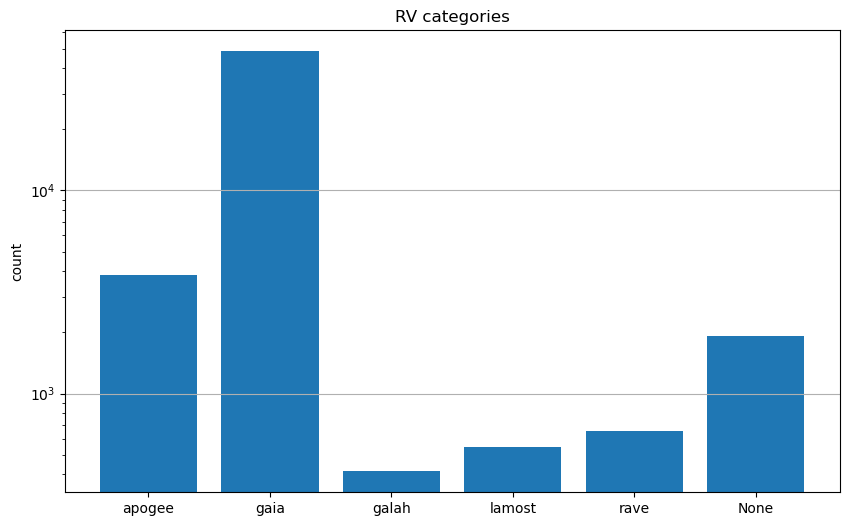

In [36]:
x = df_rv['rv_cat'].values.astype(str)
y = df_rv['count'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y)
ax.set_ylabel('count')
ax.set_yscale('log')
ax.set_title('RV categories')
ax.yaxis.grid(True)
plt.show()

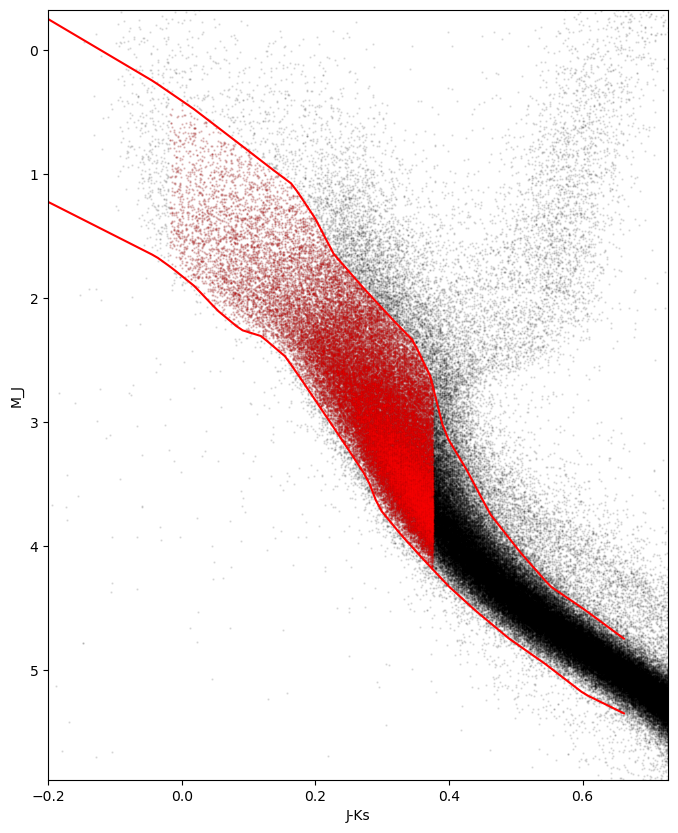

In [39]:
# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
df_AG.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_lower, 'r')
plt.xlabel("J-Ks")
plt.ylabel("M_J")
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
plt.show()

In [41]:
df_AG.export(join(data_dir, "AG.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     1.45s =  0.0m =  0.0h    
 

# LEGACY CODE, DO NOT USE

In [32]:
# Filter A star
JK_lower = (df_s[df_s['SpT'] == 'B9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'A0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2

mask_A = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_A = df_mask[mask_A]
df_A

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,7.642,7.524,7.422,A,3.157484494542792,-1.0051686797707335,5.175593137132923,0.08177575488697528,-5.210000038146973,0.46000000834465027,-9.533,0.031,-1.728,0.02949938,0.10200024,1.9400353346086296,-9.049185489941769,-3.460681286773937,0.030949907844106103,0.02955193045156427,-2.56491382341113,0.041780554587351554,1.074383794307044,2.194894358460949
1,9.5025,7.081,6.997,A,3.1836831547480737,-1.01839359506658,5.1916142405642915,0.07115948394958252,10.75,0.46000000834465027,-36.892,0.019,-10.341,0.019567432,0.083999634,1.9701892426025136,-34.73270931341571,-16.173894050282556,0.019015070324213457,0.01955278681988406,-7.283062014791548,0.03412199687478013,1.0114508732111696,2.137682612010154
2,8.8192,7.067,7.02,A,3.190016175372693,-0.9843893736218721,5.189561933845031,0.10527335750118873,8.630000114440918,0.7200000286102295,-35.956,0.021,-10.643,0.022925608,0.04699993,1.7941458700394337,-33.84384145105115,-16.14626213202649,0.021049400603645362,0.02288025840120237,-7.723155457036586,0.07663889245723429,0.8189004447255448,1.9626367679323136
3,8.738,7.213,7.129,A,3.3379725717185074,-1.204800144793709,5.277055802599279,-0.10760717020286367,12.140000343322754,0.33000001311302185,-52.691,0.022,1.906,0.024538506,0.083999634,1.920060022576977,-52.72224902187695,0.5820438773796226,0.022001693442528867,0.024536987531639038,-0.9899231754464763,0.03783182407374088,1.0114508732111696,2.137682612010154
4,9.1436,7.241,7.168,A,3.3522442432264117,-1.1716606758496402,5.281783328657951,-0.07437565746159355,12.779999732971191,0.6399999856948853,-36.034,0.02,-13.163,0.025516434,0.072999954,2.046586270290332,-35.86929562707531,-13.605416429403247,0.020000950044808518,0.02551568896777112,-7.983131167928149,0.04935198352973555,0.978417433415548,2.1076522121959527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,13.1723,5.721,5.68,A,0.9322283498786205,0.9594923178159678,2.528006436160936,-0.014700895918654502,-8.069999694824219,0.6399999856948853,-41.053,0.028,-0.357,0.02776867,0.041000366,1.3193082607392306,-33.27401011940955,-24.048212170001957,0.027922745070114302,0.027846353257065446,-8.534086898207624,0.013744147465420594,0.7406394813819892,1.8914904376199901
175,10.6428,6.175,6.144,A,0.9317299850019636,1.0256469808674504,2.489506931628384,0.0390989457156874,10.5,0.27000001072883606,14.584,0.026,-44.649,0.026324948,0.031000137,1.3102796954614782,37.73342791118874,-27.971676300699666,0.026109287079900192,0.026216560477626258,-12.037832550180141,0.015732472536168704,0.5938232424865337,1.7580211295332124
176,11.329,6.222,6.096,A,0.9651626075189959,1.0270377437647735,2.5026815673084455,0.05043973797180176,3.109999895095825,0.23999999463558197,37.626,0.02,-65.271,0.021291666,0.12599993,1.492958006052472,69.31326571302998,-29.52440538257972,0.020476497569771948,0.020833820351757047,-12.180359899759425,0.014906668016401581,1.1796459398100012,2.290587218009092
177,11.7639,6.367,6.288,A,0.9854252148945517,0.9610447776886831,2.551563923049683,0.0047329501574907805,5.869999885559082,0.1899999976158142,6.98,0.023,-27.884,0.023648046,0.078999996,1.7197567234705327,22.625053242120963,-17.72977218666929,0.023246251869516992,0.023406021782726216,-7.115952238655939,0.009473602965164921,0.9959808173673126,2.1236189248793753


In [53]:
df_A_res = df_A[["w", "e_w", "spectraltype_esphs"]]
df_A_res = df_A_res.extract()
df_A_res

#,w,e_w,spectraltype_esphs
0,-2.56491382341113,0.041780554587351554,A
1,-7.283062014791548,0.03412199687478013,A
2,-7.723155457036586,0.07663889245723429,A
3,-0.9899231754464763,0.03783182407374088,A
4,-7.983131167928149,0.04935198352973555,A
...,...,...,...
174,-8.534086898207624,0.013744147465420594,A
175,-12.037832550180141,0.015732472536168704,A
176,-12.180359899759425,0.014906668016401581,A
177,-7.115952238655939,0.009473602965164921,A


In [54]:
df_A_res.export(join(data_dir, "A-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    40.56s =  0.7m =  0.0h
 

In [38]:
# Filter F star
JK_lower = (df_s[df_s['SpT'] == 'A9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'F0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2

mask_F = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_F = df_mask[mask_F]
df_F

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,7.3246,8.551,8.289,F,3.1418749775471158,-1.0278051767267415,5.17185832976354,0.05798583407459201,-0.75,0.33000001311302185,29.992,0.011,-2.121,0.011087015,0.26200008,2.8749192046133007,29.817528954409457,3.8644109580832424,0.01100342992891995,0.011083610878151195,2.453124826426539,0.020421157807494116,2.1850851853556157,3.2046228957778324
1,9.6896,7.707,7.423,F,3.142276705247578,-0.9968835670876673,5.165917310682679,0.08833465642045026,11.989999771118164,0.28999999165534973,-37.535,0.013,-9.13,0.014650184,0.28399992,2.638529024487264,-34.97986600840274,-16.390305031761653,0.013068795970079348,0.014588847456191918,-6.928862455514765,0.026553028284624015,2.4130879396232747,3.4118981269302497
2,9.9128,8.264,7.954,F,3.1438670341919495,-0.9825163550141839,5.163918201978279,0.10259179790944045,-4.940000057220459,0.20000000298023224,-103.84,0.011,16.031,0.01131825,0.30999994,3.244981658814096,-104.96253204964547,-4.754516455660247,0.01101254011828896,0.01130604890730064,-2.7674266401263874,0.021176607217718222,2.6632705120873874,3.639336829170352
3,8.3605,7.265,7.072,F,3.165659374508306,-1.184234544806873,5.211723157069162,-0.09365876305853776,14.109999656677246,0.2800000011920929,33.896,0.017,-40.071,0.019591974,0.19299984,1.8761611225488437,40.48458294430757,-33.400934131031136,0.017088077011490357,0.0195152017841912,-20.17331612859644,0.02840877975801397,1.605942197399949,2.67812927036359
4,7.2915,8.323,8.025,F,3.191529116986311,-1.183139259088216,5.221205493450254,-0.09094993748501429,-19.350000381469727,0.23999999463558197,-26.107,0.012,1.326,0.015292156,0.29800034,2.63708435487475,-25.996567856310673,-2.7408364949837023,0.012089794249236074,0.01522126514593545,-0.016920890241693742,0.023921754835925152,2.553404068387847,3.5394582439889515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,620",10.7219,7.598,7.371,F,1.0329748351537182,0.7547239538799967,2.7062579739142194,-0.1357343191369668,11.84000015258789,0.15000000596046448,9.127,0.024,-51.602,0.016173255,0.22700024,2.7493588114490324,40.46330899384816,-33.2984858254601,0.021054331734421807,0.019856719329373728,-16.18755425902542,0.02208268415060985,1.8659015292762553,2.9144559357056865
"1,621",7.9652,8.622,8.345,F,1.0310637684090027,0.8182558714146705,2.663843715217117,-0.08817744081684818,8.0,0.15000000596046448,61.203,0.016,-81.243,0.013114984,0.27699947,3.1279831659604698,99.17310258092662,-22.603716120872797,0.014867785497765474,0.014385818851611689,-14.103460851628357,0.01572291402889117,2.340295071811664,3.345722792556058
"1,622",7.4972,8.519,8.251,F,1.0341922070734786,0.9753469858482368,2.564038107202057,0.03324251475320465,-37.209999084472656,0.15000000596046448,-29.086,0.016,34.649,0.013131474,0.26799965,2.893495535966202,-44.573708652767415,7.728718777275266,0.014874660209258171,0.014393752720902332,3.6469487450579123,0.010371974502048567,2.246558181037928,3.2605074373072074
"1,623",7.7387,9.165,8.858,G,1.0362073890258183,0.9579061185892124,2.576178390448246,0.02065543527756314,-11.729999542236328,0.20000000298023224,15.019,0.016,-42.976,0.013428698,0.30700016,3.608340017047161,39.22185774995431,-23.111746183323095,0.014981271165338315,0.01455649231664354,-14.39533396396388,0.009824637544790462,2.6367834035756075,3.6152576396141884


In [55]:
df_F_res = df_F[["w", "e_w", "spectraltype_esphs"]]
df_F_res = df_F_res.extract()
df_F_res

#,w,e_w,spectraltype_esphs
0,2.453124826426539,0.020421157807494116,F
1,-6.928862455514765,0.026553028284624015,F
2,-2.7674266401263874,0.021176607217718222,F
3,-20.17331612859644,0.02840877975801397,F
4,-0.016920890241693742,0.023921754835925152,F
...,...,...,...
"1,620",-16.18755425902542,0.02208268415060985,F
"1,621",-14.103460851628357,0.01572291402889117,F
"1,622",3.6469487450579123,0.010371974502048567,F
"1,623",-14.39533396396388,0.009824637544790462,G


In [56]:
df_F_res.export(join(data_dir, "F-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    52.28s =  0.9m =  0.0h
 

In [39]:
# Filter G star
JK_lower = (df_s[df_s['SpT'] == 'F9V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G0V']['J-K'].to_numpy()[0])/2
JK_upper = (df_s[df_s['SpT'] == 'G3V']['J-K'].to_numpy()[0]+df_s[df_s['SpT'] == 'G4V']['J-K'].to_numpy()[0])/2

mask_G = ((df_mask['J-K'] > JK_lower)
          *(df_mask['J-K'] < JK_upper)
          *(df_mask['M_J_lower'] > df_mask['M_J'])
          *(df_mask['M_J_upper'] < df_mask['M_J']))
df_G = df_mask[mask_G]
df_G

#,parallax,Jmag,Kmag,spectraltype_esphs,ra,dec,GLON,GLAT,rv,e_rv,pmra,e_pmra,pmdec,e_pmdec,J-K,M_J,pmlon,pmlat,e_pmlon,e_pmlat,w,e_w,M_J_upper,M_J_lower
0,6.7355,8.918,8.59,F,3.17863814120438,-1.1275133727261624,5.207109954687481,-0.036881994951434384,2.4600000381469727,0.6000000238418579,-55.795,0.011,-4.31,0.013121706,0.32800007,3.059849423612013,-54.30655584090892,-13.50763183160695,0.011063855177561732,0.01306791014849254,-9.590023669072771,0.023956980727508907,2.8103847473861445,3.773077043078313
1,7.5872,8.651,8.336,G,3.1935435472291815,-1.1097923965256697,5.210709654107975,-0.018347105227532114,-14.279999732971191,0.38999998569488525,-135.592,0.011,47.343,0.011883675,0.31499958,3.0514076843786544,-141.23322070383253,26.0715838149994,0.011021433819902768,0.011863799001492998,16.547108022089976,0.010300926715071157,2.7060787487607176,3.678253407964289
2,27.9869,6.421,6.097,G,3.1894388803657825,-0.8084711172841853,5.160626902040088,0.27890449117689864,13.779999732971191,0.11999999731779099,89.415,0.019,168.065,0.015960889,0.32399988,3.655773983917202,60.89130870786552,180.36944024374927,0.018925898919628138,0.016048685445803058,33.16147423530458,0.03313949612412754,2.7792848538087114,3.744804412553374
3,9.8707,8.985,8.61,G,3.198270751921076,-1.2149598514638502,5.228508119110745,-0.12202196841573068,-34.59000015258789,0.2800000011920929,-140.715,0.01,61.672,0.012228514,0.375,3.9567394196999395,-148.36246509794648,39.90896840386392,0.010055367475583306,0.012183026516790853,23.232425874782766,0.03457258873567302,3.1334258355824405,4.0667507596204
4,16.0931,7.361,7.027,G,3.2021537036716357,-0.9635508842960154,5.193166022697384,0.12690706273923302,14.25,0.12999999523162842,-94.845,0.021,29.249,0.021483162,0.3340001,3.394198610683824,-98.10477446972938,15.050955193725594,0.021010468361627604,0.021472923807720343,6.200975829380684,0.01760915737454791,2.8555642889437207,3.8141493535852007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,325",7.1641,9.551,9.181,G,1.002975342288846,0.8525024510483759,2.627399282561598,-0.07372758894196513,15.010000228881836,0.33000001311302185,36.812,0.02,3.693,0.021217208,0.3699999,3.826807837985367,26.372227150849014,25.94739347418199,0.02048666507835094,0.020747685446847974,16.01534653457238,0.027898021529253764,3.1011685871400037,4.037425988309095
"1,326",13.8946,7.908,7.581,G,1.0017423990153564,1.0256971039593152,2.5184910577438306,0.061003294209339365,5.130000114440918,0.1899999976158142,49.672,0.013,-68.038,0.014248706,0.32700014,3.6222302361371836,81.30923620731622,-22.029188259735175,0.013502102263869088,0.013773847106171928,-7.1882994564791955,0.012496910009595399,2.802687604435929,3.766079640396299
"1,327",10.7483,8.745,8.393,G,1.016092202454234,0.8340111798562614,2.645886326826144,-0.08256640387133296,15.9399995803833,0.20999999344348907,-7.835,0.017,51.89,0.015278976,0.35200024,3.901698784025273,-39.02117130527816,35.08999166377981,0.016327006687413177,0.015996124269628254,14.107354617379562,0.018691735437401776,2.982536256911822,3.9295784153743836
"1,328",6.7492,9.564,9.192,G,1.0127960530218507,0.901762398659274,2.6012517657379908,-0.031485062003006735,-80.5199966430664,0.3100000023841858,-33.44,0.014,39.618,0.012804206,0.37199974,3.710261618909702,-50.947189112832724,9.602262519909495,0.013535814573484744,0.013293962058860296,9.275137350974589,0.013502434199310931,3.1140867513564188,4.049169773960381


In [57]:
df_G_res = df_G[["w", "e_w", "spectraltype_esphs"]]
df_G_res = df_G_res.extract()
df_G_res

#,w,e_w,spectraltype_esphs
0,-9.590023669072771,0.023956980727508907,F
1,16.547108022089976,0.010300926715071157,G
2,33.16147423530458,0.03313949612412754,G
3,23.232425874782766,0.03457258873567302,G
4,6.200975829380684,0.01760915737454791,G
...,...,...,...
"1,325",16.01534653457238,0.027898021529253764,G
"1,326",-7.1882994564791955,0.012496910009595399,G
"1,327",14.107354617379562,0.018691735437401776,G
"1,328",9.275137350974589,0.013502434199310931,G


In [58]:
df_G_res.export(join(data_dir, "G-type.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :    53.45s =  0.9m =  0.0h
 